In [2]:
%pip install BeautifulSoup4 xmltodict


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
from tqdm.auto import tqdm

In [5]:
import urllib.request
from bs4 import BeautifulSoup

In [14]:
import xmltodict
import io

In [11]:
dfs = []

In [12]:
for i in tqdm(range(7)):
    carsheet = pd.read_html(f"https://carsheet.io/all-cars/max-$20000-price/min-0.09-bhp-lb/{i}00-{i+1}00/")
    dfs += [carsheet[0]]

  0%|          | 0/7 [00:00<?, ?it/s]

In [13]:
df = pd.concat(dfs)


<AxesSubplot:>

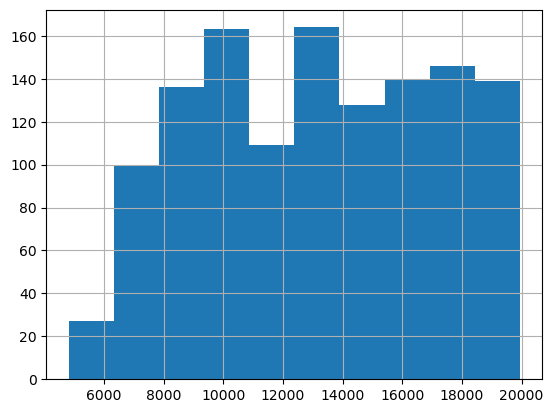

In [21]:
df['Used/New Price'].replace('[\$\,\.]', '', regex=True).astype(int).hist()

In [26]:
df['Highway Fuel Economy']

0     24 mpg
1     25 mpg
2     28 mpg
3     23 mpg
4     25 mpg
       ...  
47    23 mpg
48    22 mpg
49    23 mpg
50    22 mpg
51    23 mpg
Name: Highway Fuel Economy, Length: 1252, dtype: object

<AxesSubplot:>

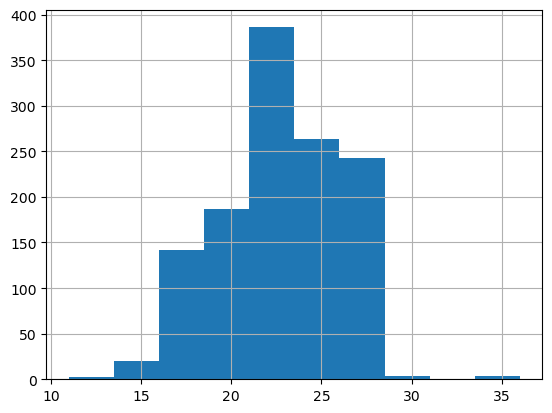

In [28]:
df['Highway Fuel Economy'].dropna().replace(' mpg', '', regex=True).astype(int).hist()

In [32]:
df['Make'].unique()

array(['Hyundai', 'Cadillac', 'INFINITI', 'Kia', 'BMW', 'Chevrolet',
       'Dodge', 'Ford', 'Mercedes-Benz', 'Nissan', 'Audi', 'Jaguar',
       'Chrysler', 'Subaru', 'Lexus', 'Porsche', 'Pontiac', 'Maserati',
       'Jeep', 'Mazda'], dtype=object)

# Parse car search

In [7]:
fp = urllib.request.urlopen("https://www.carfax.com/search?zip=94118&radius=50&priceMin=1&priceMax=20000&mileageMax=100000&vehicleCondition=USED")
mybytes = fp.read()

mystr = mybytes.decode("utf8")
fp.close()


In [8]:
parsed_html = BeautifulSoup(mystr)

In [9]:

items = parsed_html.find_all("article", "srp-list-item")

In [37]:
len(items)

25

In [20]:
import yaml

In [24]:
item = xmltodict.parse(str(items[0]))

In [29]:
item['article'].keys()

dict_keys(['@class', '@data-vin', '@id', 'div'])

In [32]:
item['article']['div'].keys()

dict_keys(['@class', 'a', 'div'])

In [36]:
len(item['article']['div']['div'])

2

In [35]:
item['article']['div']['div'][0]

{'@class': 'srp-list-item__body',
 'div': [{'@aria-label': 'Used 2017 Hyundai Elantra SE',
   '@title': 'Used 2017 Hyundai Elantra SE',
   'div': [{'@class': 'srp-list-item__top',
     'div': [{'@class': 'srp-list-item__top-image-container',
       'div': {'@class': 'srp-list-item__image',
        'figure': {'@class': 'srp-list-item__image-anchor',
         '@id': 'img-5NPD84LF1HH085432',
         '@title': '2017 Hyundai Elantra SE with 35,824 miles',
         'picture': {'source': [{'@srcset': 'https://carfax-img.vast.com/carfax/v2/3823902036334024045/1/344x258?format=webp',
            '@type': 'image/webp'},
           {'@srcset': 'https://carfax-img.vast.com/carfax/v2/3823902036334024045/1/344x258',
            '@type': 'image/jpeg'}],
          'img': {'@alt': 'Silver 2017 Hyundai Elantra Sedan',
           '@class': 'listing-image',
           '@fetchpriority': 'high',
           '@height': '258',
           '@src': 'https://carfax-img.vast.com/carfax/v2/3823902036334024045/1/344